Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [23]:
%matplotlib inline
import nsfg, thinkstats2, thinkplot, math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = nsfg.ReadFemPreg()

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age.
Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


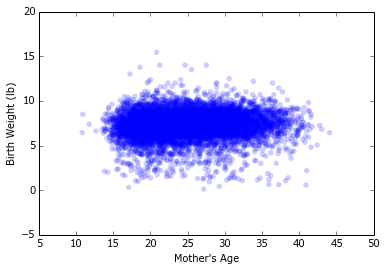

In [3]:
weight = df.totalwgt_lb
age = df.agepreg
thinkplot.Scatter(age, weight)
thinkplot.Show(xlabel='Mother\'s Age',
                   ylabel='Birth Weight (lb)')

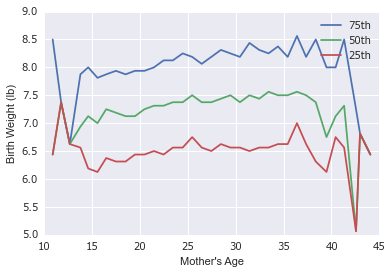

In [36]:
ndf = df.dropna(subset=['agepreg', 'totalwgt_lb'])
bins = numpy.arange(10, 45, 1)
indices = numpy.digitize(ndf.agepreg, bins)
groups = ndf.groupby(indices)
percentiles = [75, 50, 25]
ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
for percent in percentiles:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = str(percent) + 'th'
    thisplot = plt.plot(ages, weights)
plt.legend(['75th','50th','25th'])
plt.xlabel('Mother\'s Age')
plt.ylabel('Birth Weight (lb)')

In [35]:
print 'Pearsons:',thinkstats2.Corr(ndf.agepreg,ndf.totalwgt_lb)
print 'Spearmans:',thinkstats2.SpearmanCorr(ndf.agepreg,ndf.totalwgt_lb)

Pearsons: 0.0688339703541
Spearmans: 0.0946100410966


The pearson's correlation is very close to zero, which means that these two variable are not correlated.  Spearman's correlation is slightly higher than Pearson's, which is likely due to outliers in the 40-45 age range.